Importing the dependencies :
===

In [ ]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import keras

Using TensorFlow backend.


Reading the lables of the data :
===


In [64]:
y1=pd.read_csv(r'X:\dbnet-2018\train\1\behavior.csv',header=None,index_col=False)
for i in range(2,57):
    file=r'X:\dbnet-2018\train'+'\\'+str(i)+'\\'+'behavior.csv'
    yy=pd.read_csv(file,header=None)
    if len(yy)==120:                
        y1=y1.append(yy)
    else:
        print(i)
print("Are the inconsistent data files.")

11
21
26
36
51
56
Are the inconsistent data files.


In [45]:
y1

,0,1
0,0,0
1,0,2
2,0,4
3,-1,0
4,-5,11
...,...,...
115,-5,33
116,-7,33
117,-9,33
118,0,32


In [46]:
ytrain=np.array(y1[1]) #The second column consists the speeds
ytrain.shape

(6000,)

In [47]:
ytrain

array([ 0,  2,  4, ..., 33, 32, 31], dtype=int64)

Sample of an image :
===

In [59]:
import cv2
eg=cv2.imread(r'X:\dbnet-2018\train\1\dvr_66x200\0.jpg',0)

In [60]:
eg.shape

(66, 200)

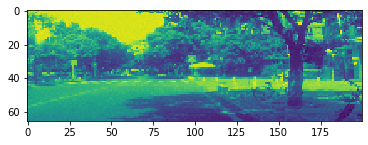

In [61]:
import matplotlib.pyplot as plt
plt.imshow(eg)

Reading the image data :
===

In [62]:
def Read(file):
    r1=cv2.imread(file,0)
    for i in range(66):
        for j in range(200):
            xxx.append(r1[i][j])

In [63]:
xxx=[]
count=0
s=[11,21,26,36,51,56]
for i in range(1,57):
    for j in range(120):
        if i in s:
            pass
        else:
            file=r'X:\dbnet-2018\train'+'\\'+str(i)+'\\'+'dvr_66x200'+'\\'+str(j)+'.jpg'
            Read(file)
            count=count+1
print(count)

6000


Reshaping the data according ti the keras' input shape configuration :
---

In [14]:
xtrain=np.array(xxx)
print(xtrain.shape)
xtrain=np.reshape(xtrain,(6000,66,200,1))
print(xtrain.shape)

(79200000,)
(6000, 66, 200, 1)


Building the model :
===

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D,LSTM,TimeDistributed
from keras.layers import Convolution2D as Conv2D
from keras.layers.normalization import BatchNormalization

model2020 = Sequential()
model2020.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(66, 200, 1)))
model2020.add(MaxPooling2D(pool_size=(2,2)))

model2020.add(Conv2D(126, kernel_size=(3,3), activation='relu'))

model2020.add(MaxPooling2D(pool_size=(2,2)))
model2020.add(BatchNormalization())
model2020.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model2020.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model2020.add(Conv2D(126, kernel_size=(3,3), activation='relu',padding='same'))
model2020.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model2020.add(BatchNormalization())
model2020.add(Dropout(0.2))
model2020.add(TimeDistributed(Flatten()))

model2020.add(LSTM(1200))
model2020.add(Dropout(0.3))

# Output Layer
model2020.add(Dense(1))
model2020.add(Activation('linear'))
model2020.summary()


# Compile the model
model2020.compile(loss='mse', optimizer='adam', metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 198, 32)       320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 99, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 97, 126)       36414     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 48, 126)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 15, 48, 126)       504       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 48, 64)        72640     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 24, 64)         0         
__________

Reading the validation data :
===

In [7]:
yval=pd.read_csv(r'X:\dbnet-2018\val\1\behavior.csv',header=None,index_col=False)
for i in range(2,18):
    file=r'X:\dbnet-2018\val'+'\\'+str(i)+'\\'+'behavior.csv'
    yy=pd.read_csv(file,header=None)
    if len(yy)==120:
        yval=yval.append(yy)

In [55]:
xxx=[]
count=0

for i in range(1,18):
    for j in range(120):
        if i==5 or i==10:         #5,10 files are inconsistent
            pass
        else:
            file=r'X:\dbnet-2018\val'+'\\'+str(i)+'\\'+'dvr_66x200'+'\\'+str(j)+'.jpg'
            Read(file)
            count=count+1
print(count)

1800


In [14]:
xval=np.array(xxx)
print(xval.shape)
xval=np.reshape(xval,(1800,66,200,1))
print(xval.shape)

(23760000,)
(1800, 66, 200, 1)


In [15]:
yval=pd.read_csv(r'X:\dbnet-2018\val\1\behavior.csv',header=None,index_col=False)
for i in range(2,18):
    file=r'X:\dbnet-2018\val'+'\\'+str(i)+'\\'+'behavior.csv'
    if i==5 or i==10:
        pass
    else:
        yval=yval.append(pd.read_csv(file,header=None),ignore_index =True)

In [16]:
yval=yval[1]

In [17]:
yval=pd.DataFrame(yval)

In [18]:
yval

,1
0,0
1,1
2,4
3,7
4,10
...,...
1795,43
1796,44
1797,44
1798,44


Training the model :
===

In [28]:
model2020.fit(xtrain,ytrain,epochs=30,batch_size=240)
#i had trained the model for 400 epochs before.

Epoch 1/30
6000/6000 [==============================] - 19s 3ms/step - loss: 0.8331 - acc: 0.4428
Epoch 2/30
6000/6000 [==============================] - 15s 2ms/step - loss: 0.8438 - acc: 0.4533
Epoch 3/30
6000/6000 [==============================] - 15s 3ms/step - loss: 0.8610 - acc: 0.4533
Epoch 4/30
6000/6000 [==============================] - 15s 3ms/step - loss: 0.8639 - acc: 0.4462
Epoch 5/30
6000/6000 [==============================] - 16s 3ms/step - loss: 0.9220 - acc: 0.4402
Epoch 6/30
6000/6000 [==============================] - 15s 3ms/step - loss: 0.9077 - acc: 0.4457
Epoch 7/30
6000/6000 [==============================] - 15s 3ms/step - loss: 0.9036 - acc: 0.4367
Epoch 8/30
6000/6000 [==============================] - 16s 3ms/step - loss: 0.9052 - acc: 0.4528
Epoch 9/30
6000/6000 [==============================] - 16s 3ms/step - loss: 0.8827 - acc: 0.4415
Epoch 10/30
6000/6000 [==============================] - 15s 3ms/step - loss: 0.8857 - acc: 0.4377
Epoch 11/30
6000/60

>MSE of the model is only 0.9161.

>And the accuracy of the model to predict the optimal speed is 45%

Saving the model :
===

In [29]:
joblib.dump(model2020,r'C:\Users\vamsi\Desktop\modelRCNN')

['C:\\Users\\vamsi\\Desktop\\modelRCNN']

Evaluating the model :
===

In [19]:
predictions=model2020.predict(xval)

In [22]:
predictions=pd.DataFrame(predictions)

In [23]:
Eval=pd.concat([yval,predictions],axis=1)

There is a very slight difference between the predictions & the original values.

However the in most of the sample of traaining data the speed of the car is given at it's initial stage.

In [25]:
Eval20=Eval[Eval[1]>=20]
len(Eval20)

1247

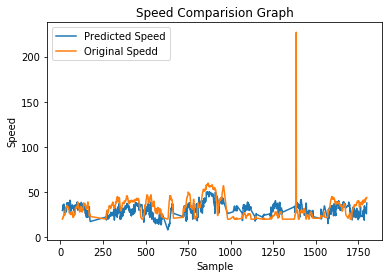

In [96]:
plt.plot(Eval[Eval[1]>=20][0],label='Predicted Speed')
plt.plot(Eval[Eval[1]>=20][1],label='Original Spedd')
plt.title('Speed Comparision Graph')
plt.xlabel('Sample')
plt.ylabel('Speed')
plt.legend()

The graph above is the comparision of the original & predicted speeds.
---

In [71]:
Eval20[Eval20[1]>Eval20[0]]

,1,0
24,25,24.353653
30,31,27.770037
31,32,31.540928
32,33,31.688635
33,33,30.079603
...,...,...
1795,43,27.634314
1796,44,26.226971
1797,44,25.937374
1798,44,35.183208


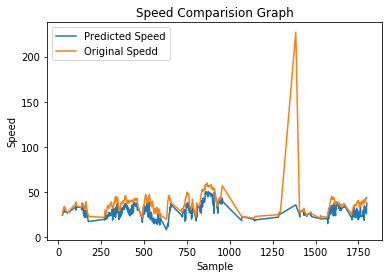

In [95]:
plt.plot(Eval20[Eval20[1]>Eval20[0]][0],label='Predicted Speed')
plt.plot(Eval20[Eval20[1]>Eval20[0]][1],label='Original Spedd')
plt.title('Speed Comparision Graph')
plt.xlabel('Sample')
plt.ylabel('Speed')
plt.legend()

>61.82% of the predictions are less than the original speed.


In [40]:
len(Eval20[Eval20[1]-Eval20[0]>10])

314

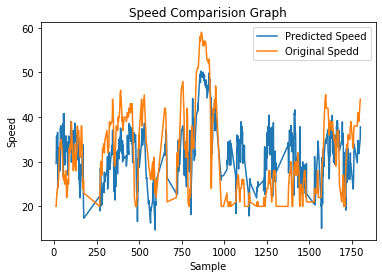

In [31]:
plt.plot(Eval20[Eval20[1]-Eval20[0]<10][0],label='Predicted Speed')
plt.plot(Eval20[Eval20[1]-Eval20[0]<10][1],label='Original Spedd')
plt.title('Speed Comparision Graph')
plt.xlabel('Sample')
plt.ylabel('Speed')
plt.legend()

>Among the 61.82% of the predictions, 64.27% of the them are very close to the original speeds.

In [41]:
len(Eval20[Eval20[0]-Eval20[1]>10])

106

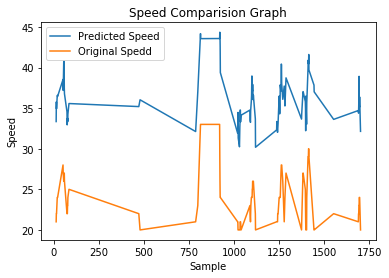

In [102]:
plt.plot(Eval20[Eval20[0]-Eval20[1]>10][0],label='Predicted Speed')
plt.plot(Eval20[Eval20[0]-Eval20[1]>10][1],label='Original Spedd')
plt.title('Speed Comparision Graph')
plt.xlabel('Sample')
plt.ylabel('Speed')
plt.legend()

>And in the remaining 38.18 of the prdictions, 77.74% of them are very close to the original speeds.

>Among the 1247 samples, 314 predictions are very less compared to the original speed & 106 predictions are bigger than the original speed.

In [33]:
print(1247-(314+106),'out of 1247 numer of predictions are correct.')

827 out of 1247 numer of predictions are correct.


Which makes the model 66% accurate.
===